In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve, auc, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")




In [3]:
df = pd.read_csv("train.csv")

# Show columns
print(df.columns)

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [ ]:
# Target column
df_y = df['Attrition']

# Map target to numeric safely
df_y = df_y.astype(str).str.strip().str.lower().map({'stayed':0, 'left':1})

# Drop ID and target for features
df_x = df.drop(['Attrition', 'Employee ID'], axis=1)

# Convert categorical features to numeric (one-hot encoding)
df_x = pd.get_dummies(df_x, drop_first=True)

# Confirm
print(df_x.shape, df_y.shape)
print(df_y.value_counts())


In [ ]:
# See the first 5 rows
train_data.head()

# Check shape (rows, columns)
train_data.shape

# Quick info
train_data.info()



In [12]:
#checking for null values
dataset.isnull().any()

Employee ID                 False
Age                         False
Gender                      False
Years at Company            False
Job Role                    False
Monthly Income              False
Work-Life Balance           False
Job Satisfaction            False
Performance Rating          False
Number of Promotions        False
Overtime                    False
Distance from Home          False
Education Level             False
Marital Status              False
Number of Dependents        False
Job Level                   False
Company Size                False
Company Tenure              False
Remote Work                 False
Leadership Opportunities    False
Innovation Opportunities    False
Company Reputation          False
Employee Recognition        False
Attrition                   False
dtype: bool

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume df_x and df_y are your features and target
df_x = dataset.drop(['Attrition', 'Employee ID'], axis=1)
df_y = dataset['Attrition']

# Convert categorical columns to dummy variables
categorical_cols = df_x.select_dtypes(include=['object']).columns
df_x = pd.get_dummies(df_x, columns=categorical_cols, drop_first=True)

# Standardize features
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)

print("Preprocessing complete. Ready for Logistic Regression!")


Preprocessing complete. Ready for Logistic Regression!


In [13]:
dataset = pd.read_csv("train.csv")
pd.options.display.max_columns = None
dataset.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                  22   Associate Degree        Married   
1       No                  21    Master’s Degree       Divorced   
2       No                  11  Bachelor’s Degree        Married   
3       No                  27        High School         Single   
4      Yes                  71        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure Remote Work  \
0                     0       Mid       Medium              89          No   
1                     3       Mid       Medium              21          No   
2                     3       Mid       Medium              74          No   
3                     2       Mid        Small              50         Yes   
4                     0    Senior       Medium              68          No   

  Leadership Opportunities Innovation Opportunities Company Reputation  \
0                       No                       No          Excellent   
1                       No                       No               Fair   
2                       No                       No               Poor   
3                       No                       No               Good   
4                       No                       No               Fair   

  Employee Recognition Attrition  
0               Medium    Stayed  
1                  Low    Stayed  
2                  Low    Stayed  
3               Medium    Stayed  
4               Medium    Stayed

In [16]:
dataset.isnull().any()

Employee ID                 False
Age                         False
Gender                      False
Years at Company            False
Job Role                    False
Monthly Income              False
Work-Life Balance           False
Job Satisfaction            False
Performance Rating          False
Number of Promotions        False
Overtime                    False
Distance from Home          False
Education Level             False
Marital Status              False
Number of Dependents        False
Job Level                   False
Company Size                False
Company Tenure              False
Remote Work                 False
Leadership Opportunities    False
Innovation Opportunities    False
Company Reputation          False
Employee Recognition        False
Attrition                   False
dtype: bool

In [17]:
#describing the dataset
dataset.describe().T

count          mean           std     min       25%  \
Employee ID           59598.0  37227.118729  21519.150028     1.0  18580.25   
Age                   59598.0     38.565875     12.079673    18.0     28.00   
Years at Company      59598.0     15.753901     11.245981     1.0      7.00   
Monthly Income        59598.0   7302.397983   2151.457423  1316.0   5658.00   
Number of Promotions  59598.0      0.832578      0.994991     0.0      0.00   
Distance from Home    59598.0     50.007651     28.466459     1.0     25.00   
Number of Dependents  59598.0      1.648075      1.555689     0.0      0.00   
Company Tenure        59598.0     55.758415     25.411090     2.0     36.00   

                          50%       75%      max  
Employee ID           37209.5  55876.75  74498.0  
Age                      39.0     49.00     59.0  
Years at Company         13.0     23.00     51.0  
Monthly Income         7354.0   8880.00  16149.0  
Number of Promotions      1.0      2.00      4.0  
Distance from Home       50.0     75.00     99.0  
Number of Dependents      1.0      3.00      6.0  
Company Tenure           56.0     76.00    128.0

Text(0.5, 1.0, 'Company Tenure')

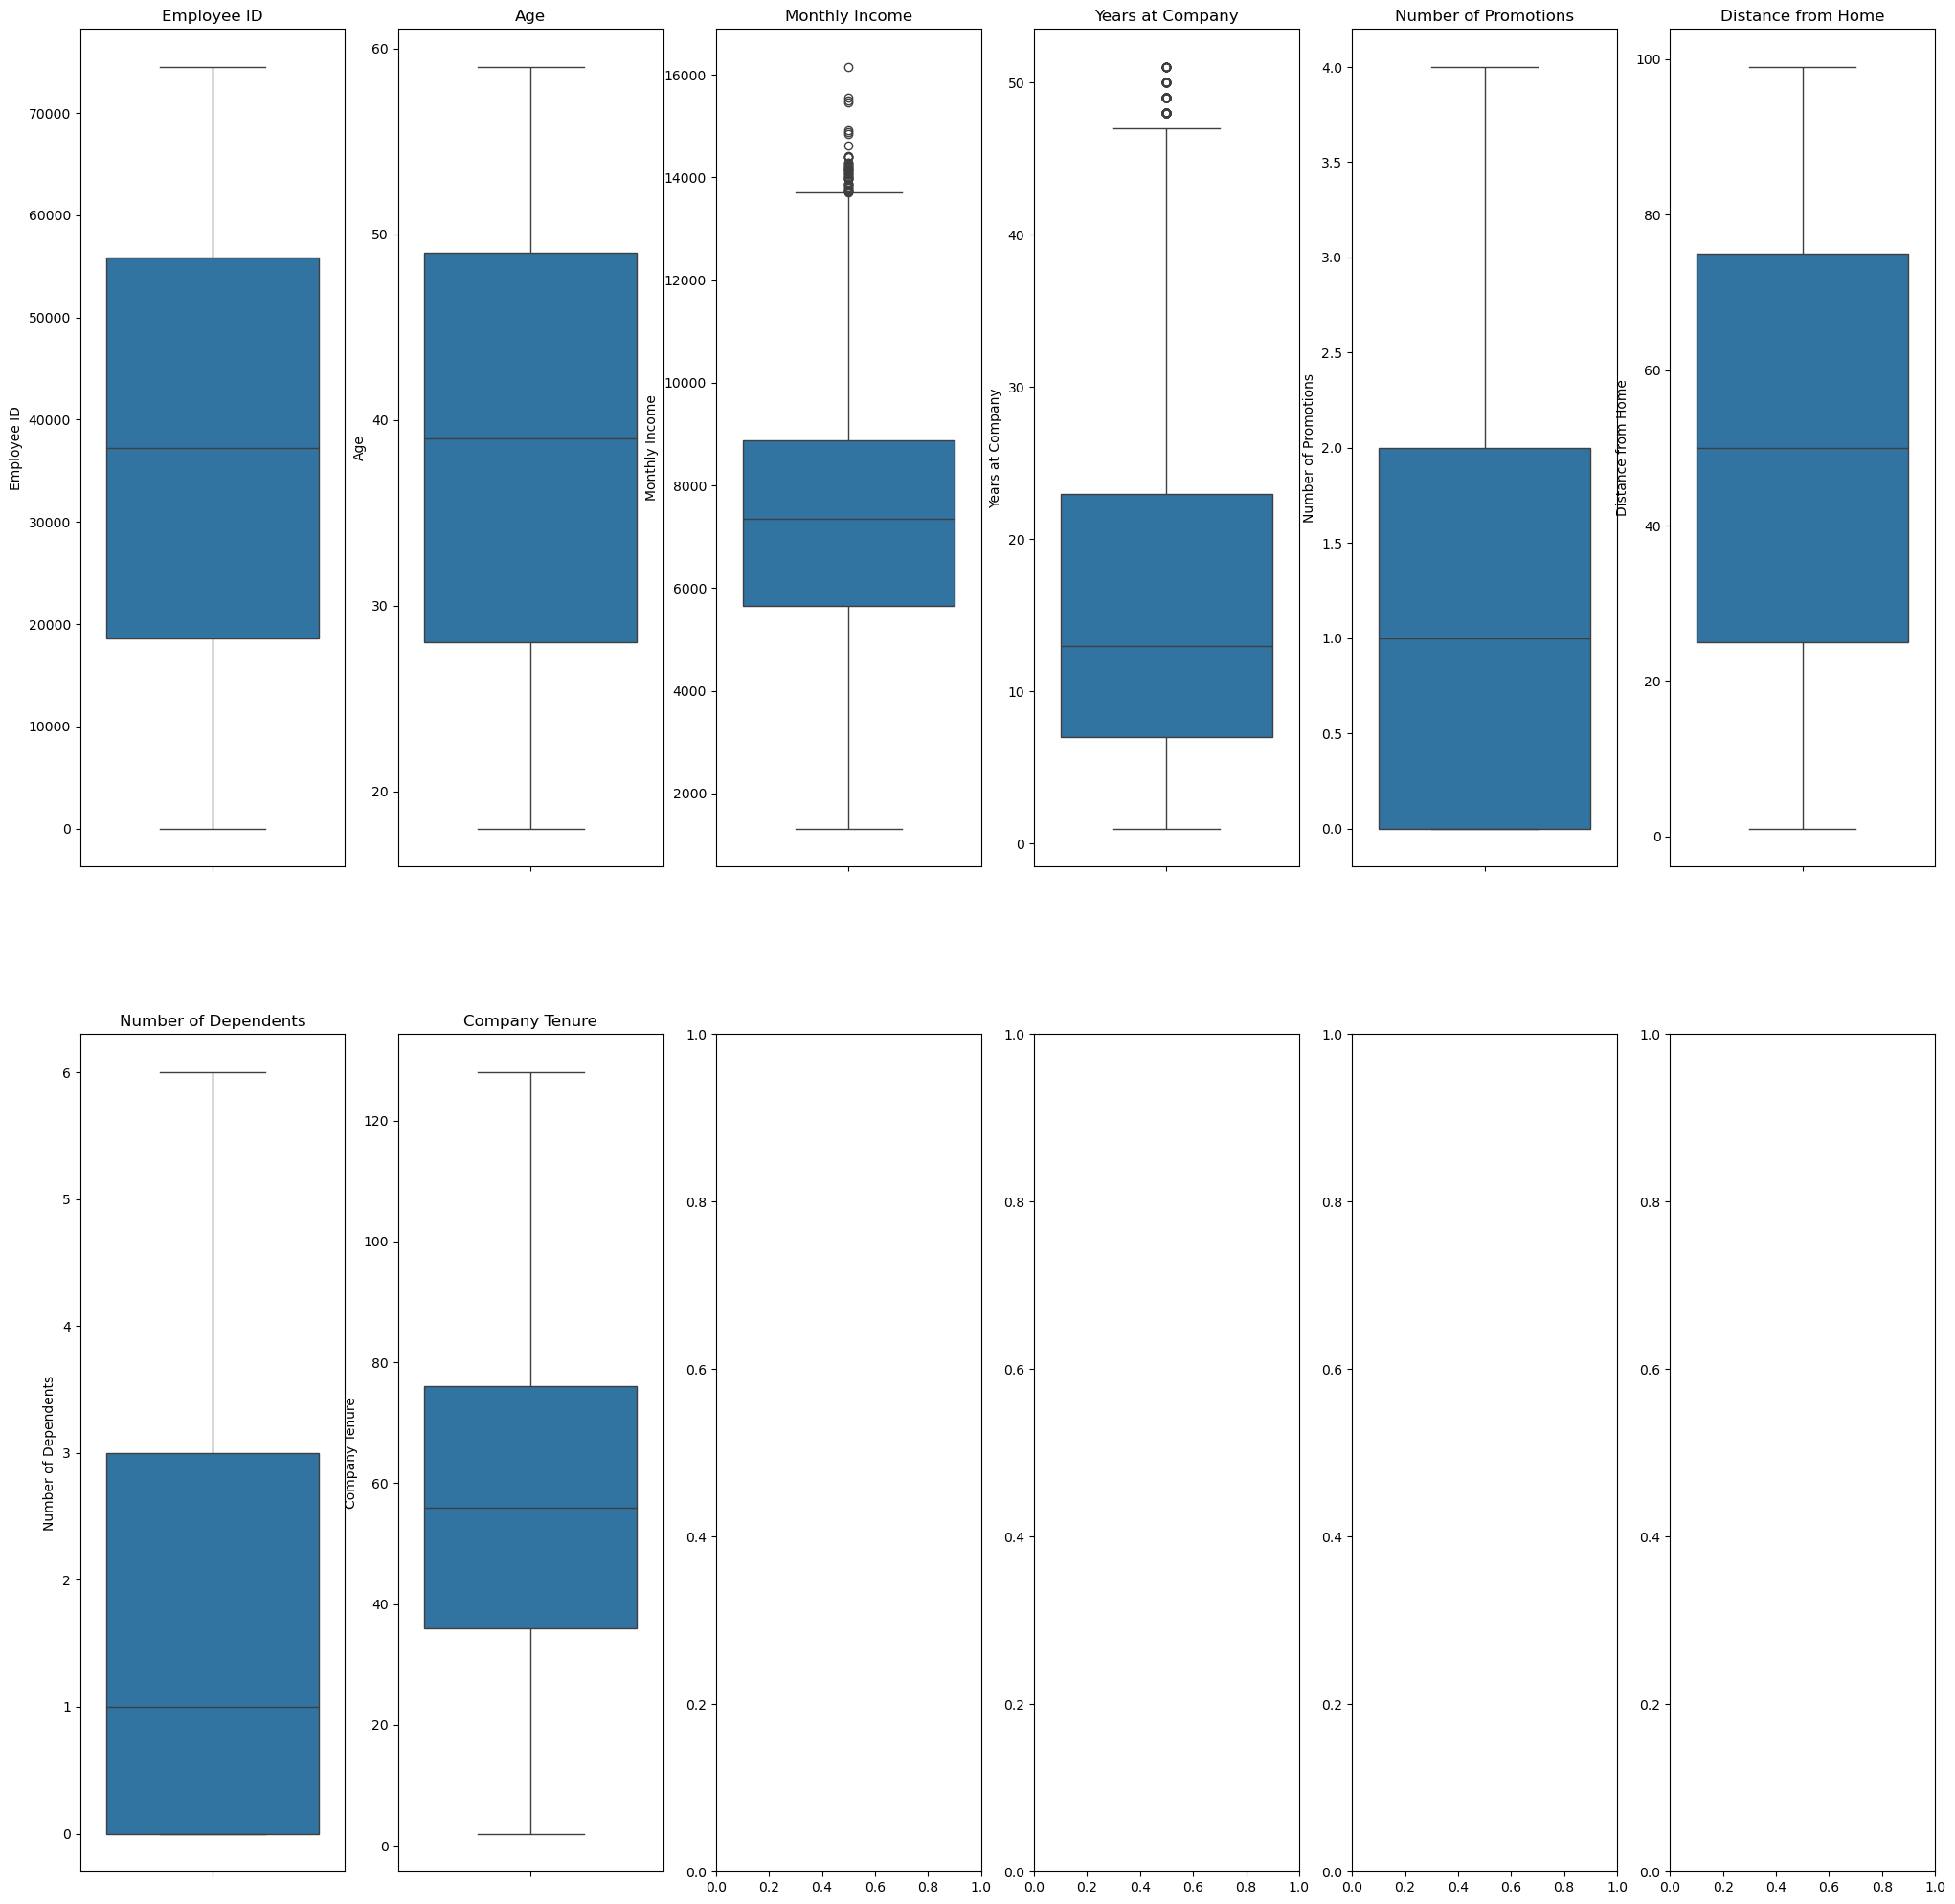

In [14]:
#using boxplot to check for outliers
f, ax = plt.subplots(2,6,figsize = (25,25))
sns.boxplot(data = dataset['Employee ID'],ax = ax[0][0]).set_title('Employee ID')
sns.boxplot(data = dataset['Age'],ax = ax[0][1]).set_title('Age')
sns.boxplot(data = dataset['Monthly Income'], ax = ax[0][2]).set_title('Monthly Income')
sns.boxplot(data = dataset['Years at Company'],ax = ax[0][3]).set_title('Years at Company')
sns.boxplot(data = dataset['Number of Promotions'],ax = ax[0][4]).set_title('Number of Promotions')
sns.boxplot(data = dataset['Distance from Home'],ax = ax[0][5]).set_title('Distance from Home')
sns.boxplot(data = dataset['Number of Dependents'],ax = ax[1][0]).set_title('Number of Dependents')
sns.boxplot(data = dataset['Company Tenure'],ax = ax[1][1]).set_title('Company Tenure')


In [16]:
# Employee ID ,Age, Number of promotions, Distance From Home , Number of dependents, company tenure has no outliers
# Years at company has moderate number of outliers
# Monthly Income have a large number of outliers.

In [17]:
dataset[['Years at Company', 'Company Tenure']].corr()


Years at Company  Company Tenure
Years at Company           1.00000         0.44218
Company Tenure             0.44218         1.00000

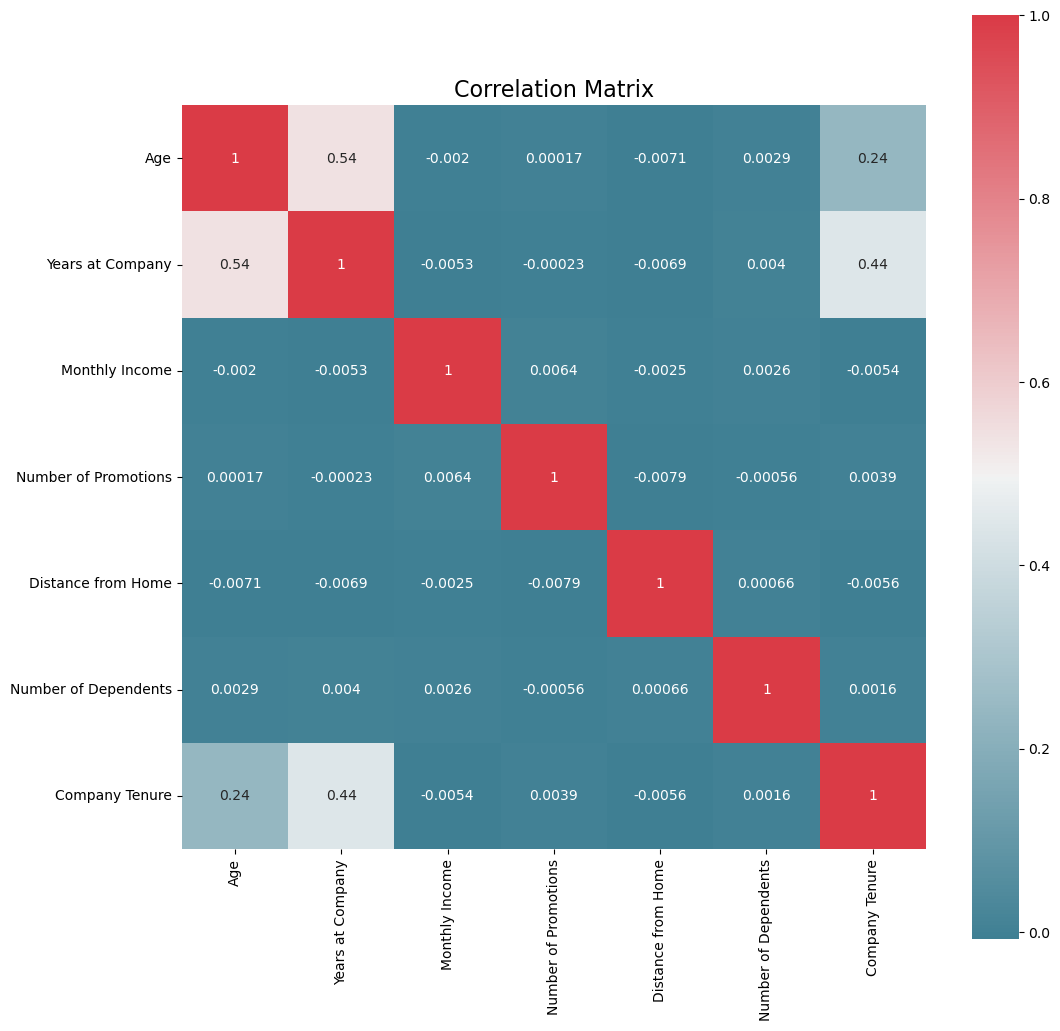

In [27]:
# Dropping Redundant Columns
dataset.drop(['Employee ID'], axis=1, inplace=True, errors='ignore')
  

# Select only numeric columns for correlation
numeric_dataset = dataset.select_dtypes(include=['int64','float64'])

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(12,12))
corr = numeric_dataset.corr()
sns.heatmap(
    corr,
    mask=np.zeros_like(corr, dtype=bool),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True,
    ax=ax
)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [30]:
#Here's a brief explanation of the correlation matrix:

#The correlation matrix shows the relationships between different factors related to employee performance and characteristics. The values range from -1 to 1, indicating the strength and direction of the correlations.

#Some key points:

#- Age has a moderate positive correlation (0.54) with Years at Company.
##- Years at Company has a weak negative correlation (-0.0053) with Monthly Income.
#- Number of Promotions has weak positive correlations with Monthly Income (0.0064) and negative correlation with Distance from Home (-0.0079).
#- Number of Dependents has a weak positive correlation (0.0016) with Company Tenure.

#This matrix provides insights into how these different factors are related, which can be useful for HR and management decision-making.


<Axes: xlabel='Attrition', ylabel='count'>

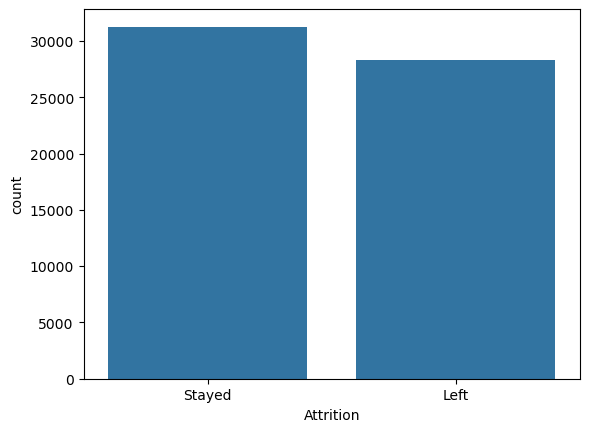

In [28]:
# Plotting the distribution of the attrition
sns.countplot(x ='Attrition',data = dataset)

In [31]:
#The "Stayed" bar is significantly higher than the "Left" bar, indicating that more employees remained with the organization compared to those who left.
#So, the data suggests an imbalance, with a higher retention rate than attrition rate.

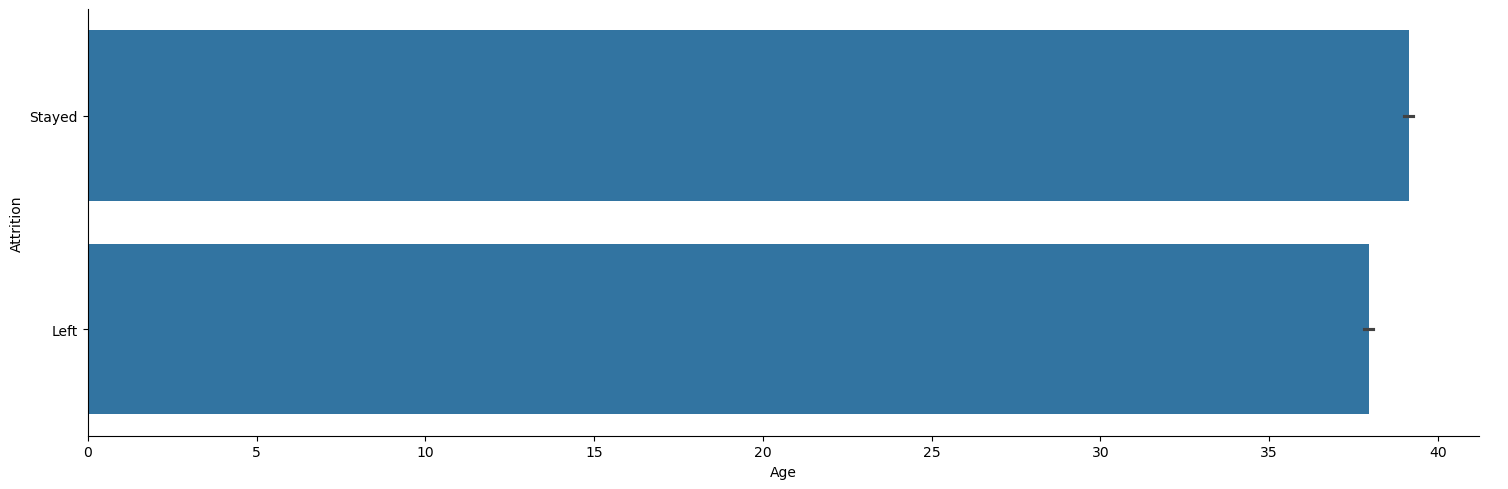

In [36]:
# Plotting Age and Attrition
sns.catplot(x = 'Age', y = 'Attrition', aspect = 3,kind = 'bar',data = dataset)

In [37]:
#Based on the graph, it seems that as age increases, the "Stayed" value increases while the "Left" value decreases, indicating that older individuals are more likely to remain in the group or organization compared to younger individuals.
# In short, Younger people tend have to higher attrition rates.

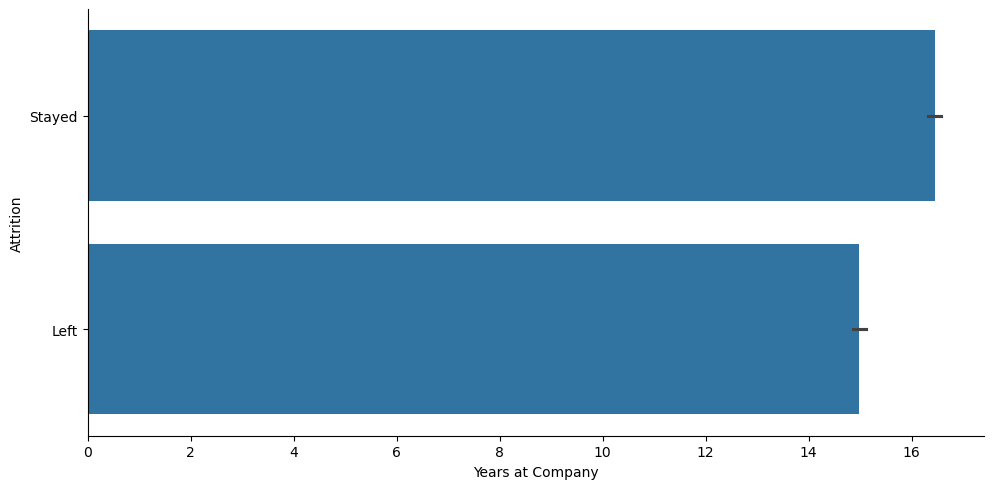

In [39]:
# Plotting Years at Company and Attrition
sns.catplot(x = 'Years at Company' , y = 'Attrition', aspect = 2, kind = 'bar', data = dataset)

In [40]:
# The chart suggests that the company has relatively low employee turnover, with most employees remaining with the company for many years.

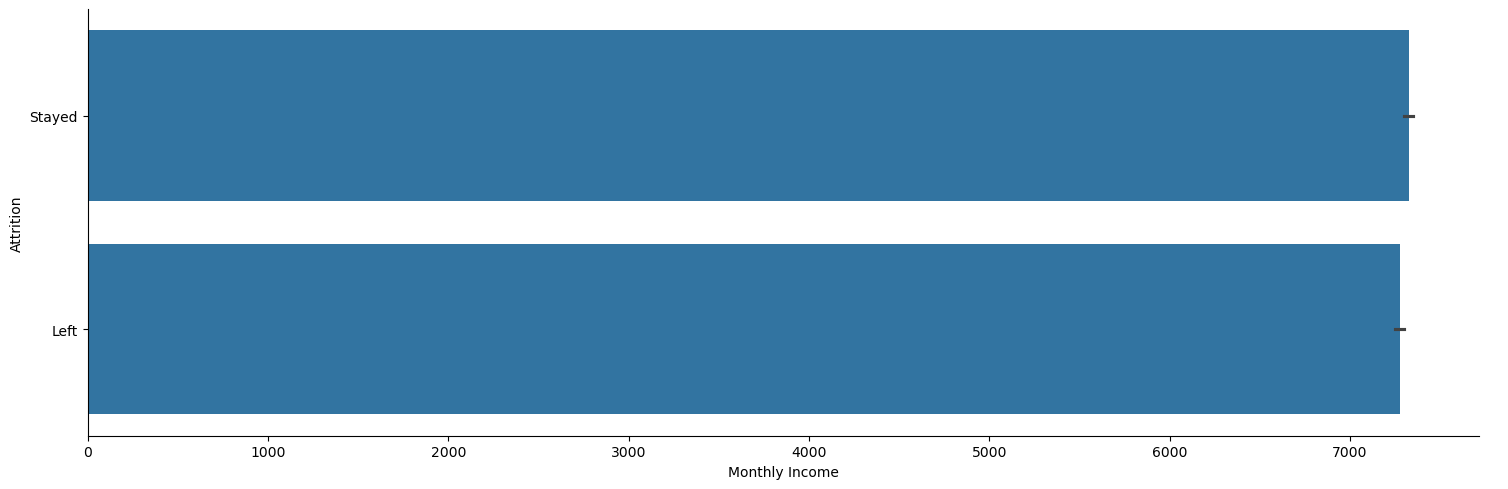

In [43]:
# Plotting Monthly Income and Attrition
sns.catplot(x = 'Monthly Income', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)

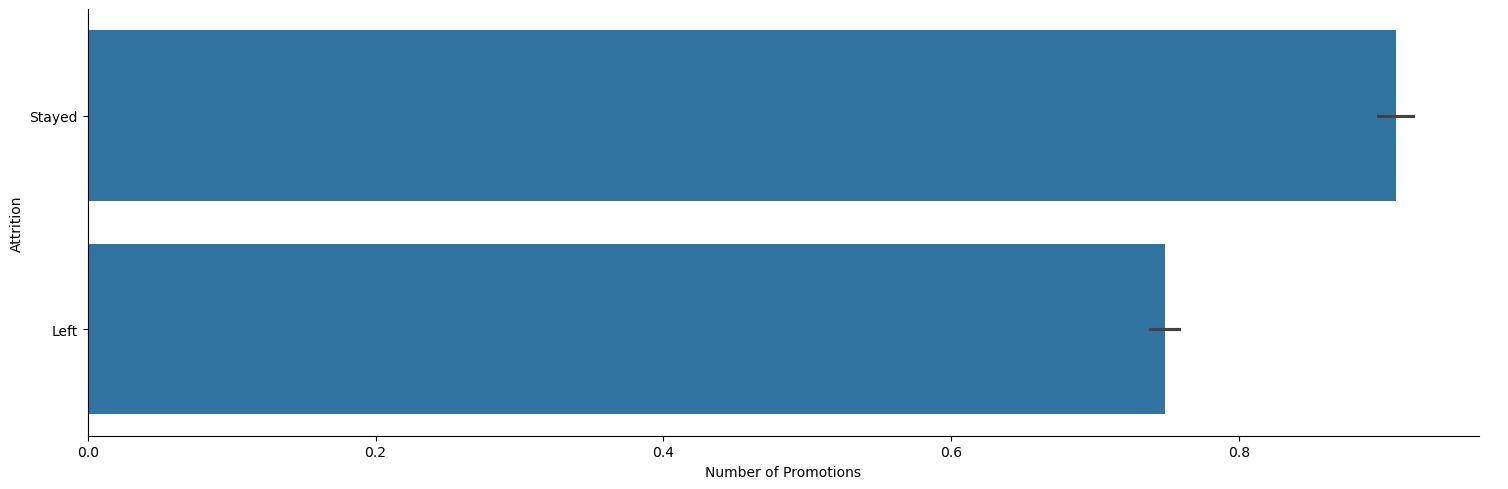

In [44]:
# Plotting Number of Promotions and Attrition
sns.catplot(x = 'Number of Promotions', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)

In [45]:
# Most employees remain with the organization as the number of promotions increases.

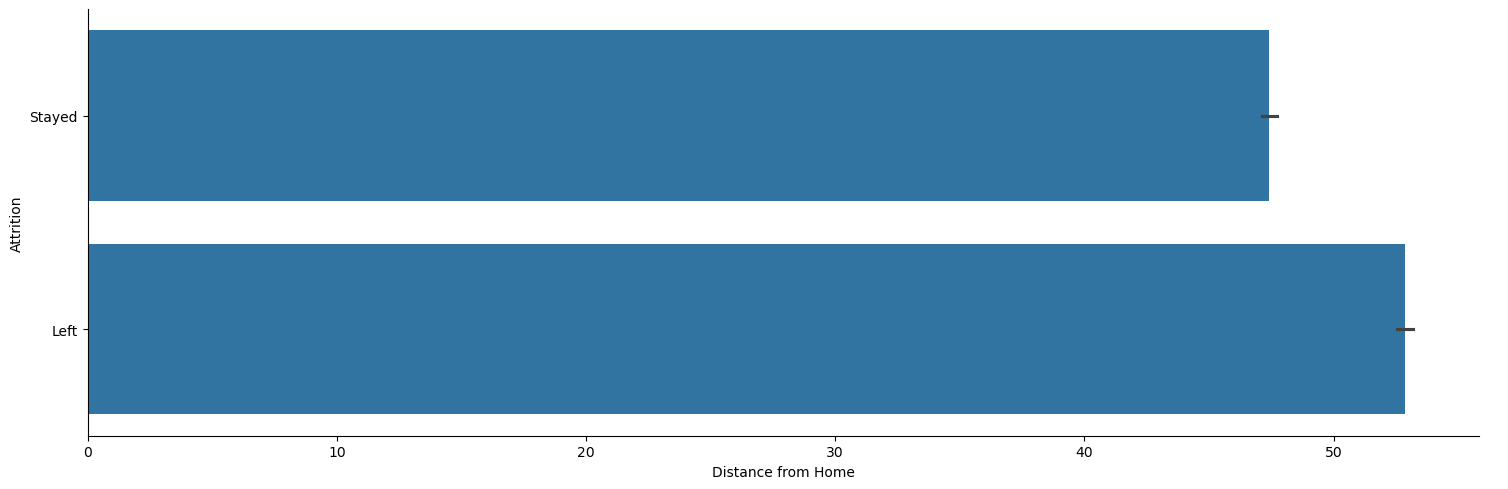

In [46]:
# Plotting Distance from Home and Attrition
sns.catplot(x = 'Distance from Home', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)

In [47]:
# employees with long distances tend to leave 

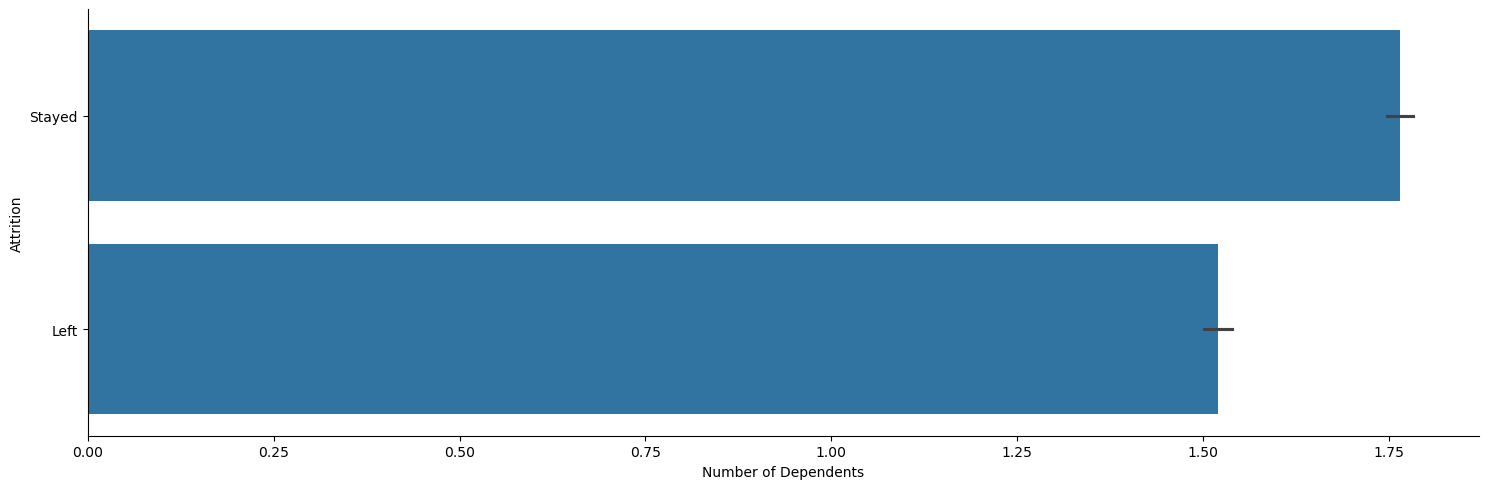

In [48]:
# Plotting Number of Dependents and Attrition
sns.catplot(x = 'Number of Dependents', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)


In [49]:
# employees with high number of dependents tend to stay

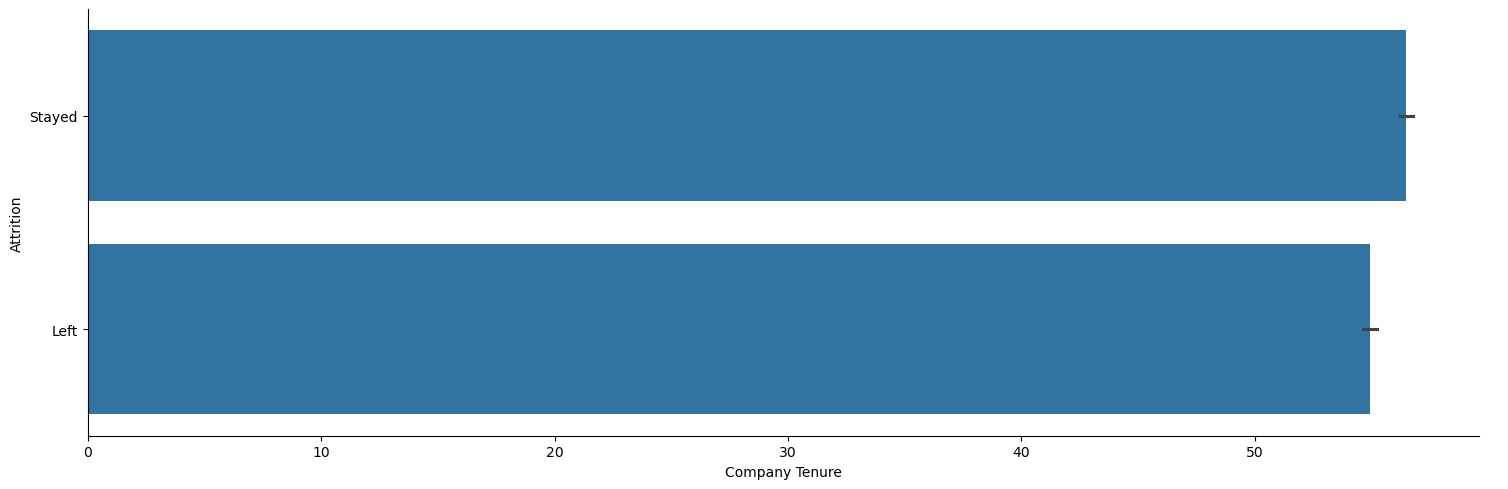

In [50]:
# Plotting Company Tenure and Attrition
sns.catplot(x = 'Company Tenure', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)


In [51]:
# the graph is showing that employees are more likely to stay with the company as their tenure increases, while the rate of employees leaving the company decreases over time.

In [74]:
# Dummy Variables are generated for categorical features
dataset = pd.get_dummies(data = dataset, columns=[ 'Overtime','Education Level','Gender','Marital Status','Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation'])
dataset.head()

Age  Number of Promotions  Number of Dependents  Company Tenure  \
0   31                     2                     0              89   
1   59                     3                     3              21   
2   24                     0                     3              74   
3   36                     1                     2              50   
4   56                     0                     0              68   

  Employee Recognition Attrition  Monthly Income_1316  Monthly Income_1435  \
0               Medium    Stayed                False                False   
1                  Low    Stayed                False                False   
2                  Low    Stayed                False                False   
3               Medium    Stayed                False                False   
4               Medium    Stayed                False                False   

   Monthly Income_1516  Monthly Income_1575  Monthly Income_1786  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_1793  Monthly Income_1806  Monthly Income_1810  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_1811  Monthly Income_1847  Monthly Income_1855  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_1888  Monthly Income_1956  Monthly Income_1960  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_2035  Monthly Income_2040  Monthly Income_2065  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_2073  Monthly Income_2075  Monthly Income_2092  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_2094  Monthly Income_2112  Monthly Income_2133  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   Monthly Income_2170  Monthly Income_2171  Monthly Income_2175  \
0                False                False                False   
1                False                False                False   
2                False                False   

In [18]:

# Select ONLY numeric columns
numeric_cols = dataset.select_dtypes(include=['int64', 'float64'])

# Apply Z-score normalization
scaler = StandardScaler()
dataset_zscore = scaler.fit_transform(numeric_cols)

# Convert back to DataFrame
dataset_zscore = pd.DataFrame(dataset_zscore, columns=numeric_cols.columns)

dataset_zscore.head()


Employee ID       Age  Years at Company  Monthly Income  \
0    -1.339150 -0.626336          0.288648       -0.888892   
1     1.279284  1.691627         -1.045173       -0.821960   
2    -0.323906 -1.205827         -0.511645        0.398153   
3     1.327381 -0.212414         -0.778409       -1.540084   
4     1.291831  1.443273          2.244918       -1.153366   

   Number of Promotions  Distance from Home  Number of Dependents  \
0              1.173308           -0.983891             -1.059395   
1              2.178351           -1.019020              0.869027   
2             -0.836777           -1.370314              0.869027   
3              0.168266           -0.808244              0.226220   
4             -0.836777            0.737448             -1.059395   

   Company Tenure  
0        1.308164  
1       -1.367856  
2        0.717865  
3       -0.226612  
4        0.481746

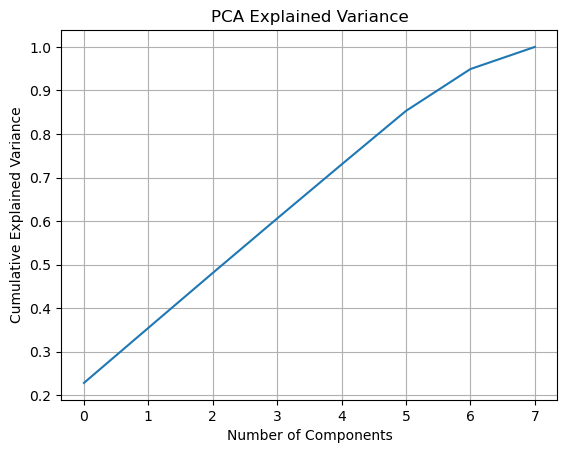

In [19]:
pca = PCA()
pca.fit(dataset_zscore)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


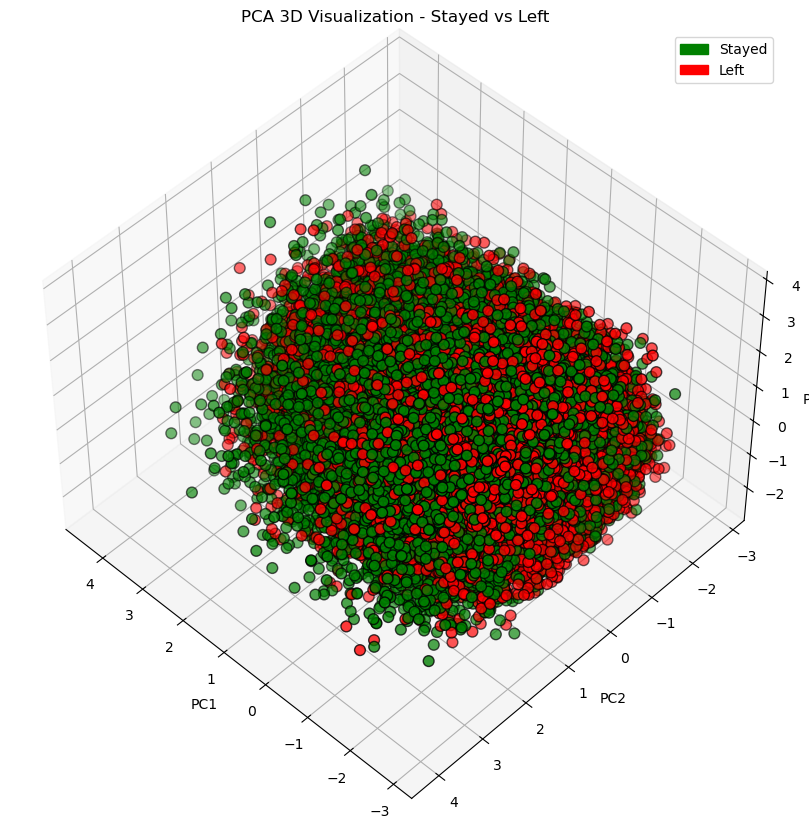

In [28]:

# Encode target: 0 = Stayed, 1 = Left
df_y = dataset['Attrition'].replace({'Stayed':0, 'Left':1})

# Drop non-numeric columns from features
df_x = dataset.drop(['Attrition', 'Employee ID'], axis=1)

# Keep only numeric columns
df_x_numeric = df_x.select_dtypes(include=[np.number])

# Standardize numeric features
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x_numeric)

# Apply PCA (3 components)
pca = PCA(n_components=3)
df_x_pca = pca.fit_transform(df_x_scaled)

# Color mapping for target
colors = ['g' if label==0 else 'r' for label in df_y]

# 3D PCA plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.scatter(df_x_pca[:,0], df_x_pca[:,1], df_x_pca[:,2], c=colors, edgecolor='k', s=60)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Visualization - Stayed vs Left')

# Legend
import matplotlib.patches as mpatches
plt.legend(handles=[mpatches.Patch(color='g', label='Stayed'),
                    mpatches.Patch(color='r', label='Left')])

plt.show()


In [48]:
# Convert target to 0/1
df_y_numeric = df_y.copy()
df_y_numeric = df_y_numeric.map({'Stayed': 0, 'Left': 1})


In [29]:

def baseline_classifier(model, params, df_x, df_y):
    """
    Converts the input dataframes into numpy arrays and evaluates a classifier
    using k-fold cross-validation with metrics: accuracy, precision, recall, f1-score.

    Args: 
        model(): The model class
        params(dict): Parameters for the model
        df_x(DataFrame): Features
        df_y(DataFrame/Series): Target labels

    Prints the evaluation metrics in a table.
    """
    # Initialize the model with parameters
    clf = model(**params)

    # Initialize 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Convert features and target to numpy arrays
    x = df_x.values
    y = df_y.values.ravel()  # flatten to 1D

    # Cross-validated scores
    scores = cross_validate(clf, x, y, cv=kfold, scoring=['accuracy','precision','recall','f1'])

    accuracy = round(np.mean(scores['test_accuracy'])*100,2)
    precision = round(np.mean(scores['test_precision'])*100,2)
    recall = round(np.mean(scores['test_recall'])*100,2)
    f1_score = round(np.mean(scores['test_f1'])*100,2)

    # Print results
    table = [[accuracy, precision, recall, f1_score]]
    print(tabulate(table, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [30]:

def modulated_freq_classifier(model, params, df_x, df_y, freq_flag):
    """
    Evaluates a classifier using k-fold cross-validation with optional
    upsampling or downsampling for imbalanced datasets.

    Args:
        model(): The classifier class
        params(dict): Dictionary of parameters for the model
        df_x(DataFrame): Feature dataframe
        df_y(DataFrame/Series): Target labels
        freq_flag(str): 'upsample' to apply SMOTE,
                        'downsample' to downsample the majority class

    Prints:
        Accuracy, Precision, Recall, F1 Score averaged across folds
    """

    clf = model(**params)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Convert to numpy arrays
    x = df_x.values
    y = df_y.values.ravel()  # Flatten to 1D

    # Initialize metrics
    accuracy = precision = recall = f1_Score = 0

    # Cross-validation loop
    for train_idx, test_idx in kfold.split(x):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if freq_flag == "upsample":
            sm = SMOTE(random_state=12)
            x_train, y_train = sm.fit_resample(x_train, y_train)

        elif freq_flag == "downsample":
            combo = np.concatenate((x_train, y_train.reshape(-1,1)), axis=1)
            df = pd.DataFrame(combo)
            df_majority = df[df.iloc[:,-1]==0]
            df_minority = df[df.iloc[:,-1]==1]
            df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)
            df_down = pd.concat([df_majority_down, df_minority])
            x_train = df_down.iloc[:,:-1].values
            y_train = df_down.iloc[:,-1].values

        # Fit model and predict
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        # Accumulate metrics
        accuracy += accuracy_score(y_test, y_pred)
        precision += precision_score(y_test, y_pred)
        recall += recall_score(y_test, y_pred)
        f1_Score += f1_score(y_test, y_pred)

    # Average metrics over folds
    n_splits = kfold.get_n_splits()
    accuracy = round((accuracy / n_splits) * 100, 2)
    precision = round((precision / n_splits) * 100, 2)
    recall = round((recall / n_splits) * 100, 2)
    f1_Score = round((f1_Score / n_splits) * 100, 2)

    # Print metrics
    print(tabulate([[accuracy, precision, recall, f1_Score]],
                   headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [34]:

def returnData(model, params, df_x, df_y):
    """
    Returns evaluation metrics (Accuracy, Precision, Recall, F1 Score) 
    for a given dataset and classifier using 10-fold cross-validation.

    Args: 
        model(): Classifier class
        params (dict): Parameters for the classifier
        df_x (DataFrame): Feature dataframe
        df_y (DataFrame/Series): Target labels

    Returns:
        list: [Accuracy, Precision, Recall, F1 Score] in percentage
    """

    # Initialize the model
    clf = model(**params)

    # K-Fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Convert to numpy arrays and ensure proper shape
    x = df_x.values
    y = df_y.values.ravel()  # flatten to 1D

    # Compute cross-validated metrics
    scores = cross_validate(clf, x, y, cv=kfold, scoring=['accuracy','f1','precision','recall'])

    # Average and round the scores
    accuracy = round(np.mean(scores['test_accuracy']) * 100, 2)
    precision = round(np.mean(scores['test_precision']) * 100, 2)
    recall = round(np.mean(scores['test_recall']) * 100, 2)
    f1_Score = round(np.mean(scores['test_f1']) * 100, 2)

    return [accuracy, precision, recall, f1_Score]

    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'])

    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)

    data = [accuracy,precision,recall,f1_Score]
    return data

In [35]:


def makeGraphMD(model, df_x, df_y):
    """
    Plots metrics vs tree depth for tree-based classifiers.

    Args: 
        model(): Classifier class (e.g., DecisionTreeClassifier)
        df_x (DataFrame): Features
        df_y (DataFrame/Series): Target labels
    """
    precision = []
    recall = []
    f1 = []
    accuracy = []

    vals = list(range(1, 16))  # Depth values from 1 to 15

    for depth in vals:
        # Get metrics for current depth
        data = returnData(model, {'random_state':27, 'max_depth':depth}, df_x, df_y)
        accuracy.append(data[0])
        precision.append(data[1])
        recall.append(data[2])
        f1.append(data[3])

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(vals, accuracy, label='Accuracy', marker='o')
    plt.plot(vals, precision, label='Precision', marker='o')
    plt.plot(vals, recall, label='Recall', marker='o')
    plt.plot(vals, f1, label='F1-score', marker='o')
    plt.xlabel("Tree Depth")
    plt.ylabel("Metric Value (%)")
    plt.title(f"Metrics vs Depth for {model.__name__}")
    plt.xticks(vals)
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
def baseline_classifier(model, params, df_x, df_y):
    """
    Baseline classifier that automatically handles categorical columns.

    Args: 
      model(): The model class
      params(dict): Parameters for the model
      df_x(DataFrame): Feature set
      df_y(DataFrame): Target variable (0 = Stayed, 1 = Left)

    Prints:
      Accuracy, Precision, Recall, and F1 Score (10-fold CV)
    """

    # One-hot encode categorical columns
    df_x_encoded = pd.get_dummies(df_x, drop_first=True)

    # Convert to numpy arrays
    x = df_x_encoded.values
    y = df_y.values

    # Initialize model
    clf = model(**params)

    # Initialize 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Compute cross-validated scores
    scores = cross_validate(clf, x, y, cv=kfold, scoring=['accuracy','precision','recall','f1'])

    # Average scores
    accuracy = round(np.mean(scores['test_accuracy']) * 100, 2)
    precision = round(np.mean(scores['test_precision']) * 100, 2)
    recall = round(np.mean(scores['test_recall']) * 100, 2)
    f1_score_val = round(np.mean(scores['test_f1']) * 100, 2)

    # Display in table
    data = [[accuracy, precision, recall, f1_score_val]]
    print(tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [44]:

def baseline_classifier(model_class, params, df_x, df_y):
    """
    Baseline classifier with automatic handling of categorical columns and scaling.
    Converts categorical columns to numeric (one-hot encoding) and scales features.
    Evaluates the model using 10-fold cross-validation.
    
    Args:
        model_class: sklearn model class (e.g., LogisticRegression)
        params: dict of parameters for the model
        df_x: DataFrame of features
        df_y: Series or DataFrame of target labels
    
    Prints:
        Accuracy, Precision, Recall, F1 Score in a tabular format
    """
    
    # 1. One-hot encode categorical columns
    categorical_cols = df_x.select_dtypes(include=['object']).columns
    df_x_encoded = pd.get_dummies(df_x, columns=categorical_cols, drop_first=True)
    
    # 2. Scale numeric features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_x_encoded)
    
    # 3. Prepare target array
    y_array = df_y.values.ravel()
    
    # 4. Initialize the model
    model = model_class(**params)
    
    # 5. 10-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_validate(
        model,
        X_scaled,
        y_array,
        cv=kfold,
        scoring={
            'accuracy':'accuracy',
            'precision': make_scorer(precision_score, zero_division=0),
            'recall': make_scorer(recall_score, zero_division=0),
            'f1': make_scorer(f1_score, zero_division=0)
        }
    )
    
    # 6. Compute mean scores
    accuracy = round(scores['test_accuracy'].mean()*100, 2)
    precision = round(scores['test_precision'].mean()*100, 2)
    recall = round(scores['test_recall'].mean()*100, 2)
    f1_Score = round(scores['test_f1'].mean()*100, 2)
    
    # 7. Display results
    data = [[accuracy, precision, recall, f1_Score]]
    print(tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [45]:
baseline_classifier(LogisticRegression, {}, df_x, df_y)


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     75.07          nan       nan         nan


In [51]:

# Initialize the classifier
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Use stratified KFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Run cross-validation with safe scoring
scores = cross_validate(
    clf,
    df_x.values,  # your feature matrix
    df_y.values.ravel(),  # your target
    cv=kfold,
    scoring={
        'accuracy':'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }
)

# Display average scores
accuracy = round(scores['test_accuracy'].mean() * 100, 2)
precision = round(scores['test_precision'].mean() * 100, 2)
recall = round(scores['test_recall'].mean() * 100, 2)
f1_score_avg = round(scores['test_f1'].mean() * 100, 2)

print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1 Score: {f1_score_avg}%")


Accuracy: 74.48%
Precision: nan%
Recall: nan%
F1 Score: nan%


In [46]:

def modulated_freq_classifier(model_class, params, df_x, df_y, freq_flag):
    """
    Classifier with automatic handling of categorical columns, scaling, and up/down sampling.
    
    Args:
        model_class: sklearn model class
        params: dict of model parameters
        df_x: feature DataFrame
        df_y: target Series
        freq_flag: 'upsample' or 'downsample'
    """
    
    # 1. One-hot encode categorical columns
    categorical_cols = df_x.select_dtypes(include=['object']).columns
    df_x_encoded = pd.get_dummies(df_x, columns=categorical_cols, drop_first=True)
    
    # 2. Scale features
    scaler = StandardScaler()
    X = scaler.fit_transform(df_x_encoded)
    y = df_y.values.ravel()
    
    # 3. Initialize model and KFold
    model = model_class(**params)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Metrics
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        if freq_flag == 'upsample':
            sm = SMOTE(random_state=42)
            X_train, y_train = sm.fit_resample(X_train, y_train)
        
        elif freq_flag == 'downsample':
            combo = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
            df_train = pd.DataFrame(combo)
            df_majority = df_train[df_train.iloc[:,-1] == 0]
            df_minority = df_train[df_train.iloc[:,-1] == 1]
            df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
            df_downsampled = pd.concat([df_majority_down, df_minority])
            X_train = df_downsampled.iloc[:,:-1].values
            y_train = df_downsampled.iloc[:,-1].values
        
        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Update metrics
        accuracy += accuracy_score(y_test, y_pred)
        precision += precision_score(y_test, y_pred, zero_division=0)
        recall += recall_score(y_test, y_pred, zero_division=0)
        f1_Score += f1_score(y_test, y_pred, zero_division=0)
    
    # Average metrics
    n_splits = kfold.get_n_splits()
    accuracy = round(accuracy / n_splits * 100, 2)
    precision = round(precision / n_splits * 100, 2)
    recall = round(recall / n_splits * 100, 2)
    f1_Score = round(f1_Score / n_splits * 100, 2)
    
    # Display results
    print(tabulate([[accuracy, precision, recall, f1_Score]], headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [50]:
modulated_freq_classifier(LogisticRegression, {'random_state':42, 'max_iter':1000}, df_x, df_y_numeric, "upsample")


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     75.09        72.97     75.64       74.28


In [52]:
modulated_freq_classifier(LogisticRegression, {'random_state':42, 'max_iter':1000}, df_x, df_y_numeric, "downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     75.03        72.82     75.75       74.26


In [45]:
df_y.unique()


array([nan])

In [48]:
# Inspect unique values to see what's actually in the column
print(df_y.unique())


[nan]


In [49]:
# Step 1: Convert to string, strip spaces, lowercase everything
df_y_clean = df_y.astype(str).str.strip().str.lower()

# Step 2: Map to 0/1 safely
df_y_mapped = df_y_clean.map({'stayed': 0, 'left': 1})

# Step 3: Check if any NaNs remain
print("Number of unmapped rows:", df_y_mapped.isna().sum())

# Step 4: Assign back to df_y
df_y = df_y_mapped


Number of unmapped rows: 59598


In [50]:
print(df_y.value_counts())


Series([], Name: count, dtype: int64)


In [46]:
# Clean text first
df_y = df_y.astype(str).str.strip().str.lower()

# Now remap safely
df_y = df_y.map({'stayed': 0, 'left': 1})

# Confirm no NaNs remain
print(df_y.isna().sum())


59598


In [54]:

# Show all original unique values BEFORE mapping
print(data['Attrition'].unique())



['Stayed' 'Left']


In [55]:
# Clean target properly
df_y = data['Attrition'].astype(str)
df_y = df_y.str.strip()
df_y = df_y.str.lower()

# Replace all possible variations safely
df_y = df_y.replace({
    'stayed': 0,
    'stay': 0,
    'no': 0,
    '0': 0,

    'left': 1,
    'leave': 1,
    'yes': 1,
    '1': 1
})

# Force numeric
df_y = pd.to_numeric(df_y, errors='coerce')

# Final safety check
print("Missing labels after mapping:", df_y.isna().sum())


Missing labels after mapping: 0


In [56]:
baseline_classifier(GaussianNB, {}, df_x, df_y)
baseline_classifier(RandomForestClassifier, {'random_state':27, 'max_depth':7}, df_x, df_y)



  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     72.14        68.35     77.09       72.46
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.39        73.43     72.28       72.85


In [55]:

def modulated_freq_classifier(model_class, params, df_x, df_y, freq_flag):
    """
    Classifier with automatic preprocessing and up/downsampling.

    Args: 
      model_class(): The model class
      params(dict): Classifier parameters
      df_x(DataFrame): Features
      df_y(DataFrame or Series): Target labels (categorical or numeric)
      freq_flag(str): 'upsample' or 'downsample'

    Prints the evaluation metrics (Accuracy, Precision, Recall, F1 Score)
    """

    # Convert target to numeric if it is categorical
    if df_y.dtype == 'object' or isinstance(df_y.iloc[0], str):
        df_y_numeric = df_y.map({df_y.unique()[0]:0, df_y.unique()[1]:1})
    else:
        df_y_numeric = df_y.copy()

    # One-hot encode categorical features
    df_x_encoded = pd.get_dummies(df_x)

    # Scale numeric features
    scaler = StandardScaler()
    df_x_scaled = scaler.fit_transform(df_x_encoded)

    # Initialize model
    model = model_class(**params)
    
    # K-Fold
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Metrics accumulator
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0

    x = df_x_scaled
    y = df_y_numeric.values

    for train_idx, test_idx in kfold.split(x):
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Upsample or downsample
        if freq_flag == "upsample":
            sm = SMOTE(random_state=12)
            x_train, y_train = sm.fit_resample(x_train, y_train)
        elif freq_flag == "downsample":
            combo = np.concatenate((x_train, y_train.reshape(-1,1)), axis=1)
            df_train = pd.DataFrame(combo)
            df_majority = df_train[df_train.iloc[:,-1]==0]
            df_minority = df_train[df_train.iloc[:,-1]==1]
            df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=123)
            df_train_balanced = pd.concat([df_majority_down, df_minority])
            x_train = df_train_balanced.iloc[:,:-1].values
            y_train = df_train_balanced.iloc[:,-1].values

        # Fit model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Update metrics
        accuracy += accuracy_score(y_test, y_pred)
        precision += precision_score(y_test, y_pred, zero_division=0)
        recall += recall_score(y_test, y_pred, zero_division=0)
        f1_Score += f1_score(y_test, y_pred, zero_division=0)

    # Average metrics
    accuracy = round(accuracy / kfold.get_n_splits() * 100, 2)
    precision = round(precision / kfold.get_n_splits() * 100, 2)
    recall = round(recall / kfold.get_n_splits() * 100, 2)
    f1_Score = round(f1_Score / kfold.get_n_splits() * 100, 2)

    # Display
    print(tabulate([[accuracy, precision, recall, f1_Score]], headers=["Accuracy","Precision","Recall","F1 Score"]))


In [ ]:
df_y = df_y.map({'Stayed': 0, 'Left': 1})

In [37]:
baseline_classifier(GaussianNB,{},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     72.14        68.35     77.09       72.46


In [57]:
modulated_freq_classifier(GaussianNB, {}, df_x, df_y, "upsample")


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     72.34         68.6     77.11       72.61


In [58]:
modulated_freq_classifier(GaussianNB, {}, df_x, df_y, "downsample")


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     72.39        68.58     77.38       72.72


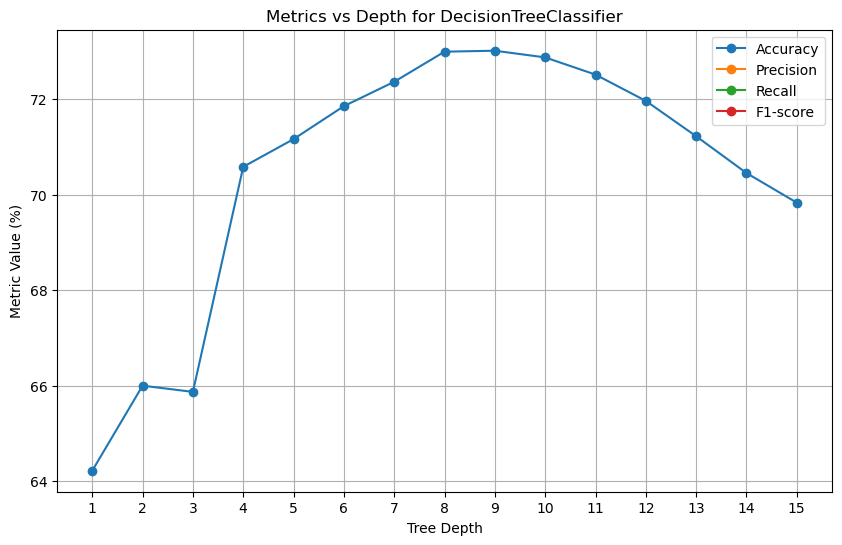

In [59]:
makeGraphMD(DecisionTreeClassifier, df_x, df_y)

In [ ]:
df_y = df_y.map({'Stayed': 0, 'Left': 1})

In [36]:
baseline_classifier(DecisionTreeClassifier,{'max_depth':8},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     73.01        70.27     75.01       72.54


In [61]:
modulated_freq_classifier(DecisionTreeClassifier,{},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     66.56        64.76     65.11       64.93


In [62]:
modulated_freq_classifier(DecisionTreeClassifier,{},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      66.6        64.36     66.66       65.49


In [8]:

def returnData(model_class, params, df_x, df_y):

    # Ensure numeric target
    if df_y.dtype == 'object':
        df_y = df_y.map({df_y.unique()[0]: 0, df_y.unique()[1]: 1})

    # One-hot encode features
    df_x_encoded = pd.get_dummies(df_x)

    # Scale features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(df_x_encoded)

    y = df_y.values.ravel()

    # Initialize model
    model = model_class(**params)

    # Stratified KFold
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = cross_validate(
        model,
        x_scaled,
        y,
        cv=kfold,
        scoring={
            'accuracy': 'accuracy',
            'precision': 'precision',
            'recall': 'recall',
            'f1': 'f1'
        }
    )

    accuracy = round(scores['test_accuracy'].mean() * 100, 2)
    precision = round(scores['test_precision'].mean() * 100, 2)
    recall = round(scores['test_recall'].mean() * 100, 2)
    f1_Score = round(scores['test_f1'].mean() * 100, 2)

    return [accuracy, precision, recall, f1_Score]



In [19]:

def makeGraphMD(model, df_x, df_y):

    precision = []
    recall = []
    f1 = []

    vals = list(range(1, 16))

    for i in vals:
        print(f"Training at depth = {i}...")
        data = returnData(model, {'random_state': 27, 'max_depth': i}, df_x, df_y)

        precision.append(data[1])
        recall.append(data[2])
        f1.append(data[3])

    plt.figure(figsize=(10, 6))
    plt.plot(vals, precision, label="Precision")
    plt.plot(vals, recall, label="Recall")
    plt.plot(vals, f1, label="F1-score")
    plt.xlabel("Tree Depth")
    plt.ylabel("Metric Value (%)")
    plt.title("Random Forest Performance vs Tree Depth")
    plt.legend()
    plt.grid(True)
    plt.show()



In [20]:
import pandas as pd

data = pd.read_csv("train.csv")   # replace with your real filename


In [21]:
print(data.shape)
print(data.head())


(59598, 24)
   Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level

In [22]:
print(data.columns)


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [23]:

# Features (X) and Target (y)
df_x = data.drop(columns=['Attrition'])
df_y = data['Attrition']

print("X shape:", df_x.shape)
print("y shape:", df_y.shape)
print(df_y.value_counts())




X shape: (59598, 23)
y shape: (59598,)
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64


In [26]:

def modulated_freq_classifier(model_class, params, df_x, df_y, freq_flag="normal"):

    # Detect categorical and numerical columns
    cat_cols = df_x.select_dtypes(include=['object']).columns
    num_cols = df_x.select_dtypes(exclude=['object']).columns

    # Preprocessing pipelines
    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ])

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    accuracy = precision = recall = f1_Score = 0

    for train_idx, test_idx in kfold.split(df_x, df_y):
        X_train, X_test = df_x.iloc[train_idx], df_x.iloc[test_idx]
        y_train, y_test = df_y.iloc[train_idx], df_y.iloc[test_idx]

        # Upsampling if selected
        if freq_flag == "upsample":
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)

        model = model_class(**params)

        pipe = Pipeline([
            ("prep", preprocessor),
            ("model", model)
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        accuracy += accuracy_score(y_test, y_pred)
        precision += precision_score(y_test, y_pred, average="weighted", zero_division=0)
        recall += recall_score(y_test, y_pred, average="weighted", zero_division=0)
        f1_Score += f1_score(y_test, y_pred, average="weighted", zero_division=0)

    accuracy /= 10
    precision /= 10
    recall /= 10
    f1_Score /= 10

    print("\nModel Performance:")
    print(f"Accuracy  : {round(accuracy*100,2)} %")
    print(f"Precision : {round(precision*100,2)} %")
    print(f"Recall    : {round(recall*100,2)} %")
    print(f"F1 Score  : {round(f1_Score*100,2)} %")


In [27]:
from sklearn.ensemble import RandomForestClassifier

modulated_freq_classifier(
    RandomForestClassifier,
    {'random_state':42},
    df_x,
    df_y,
    "upsample"
)



Model Performance:
Accuracy  : 74.67 %
Precision : 74.71 %
Recall    : 74.67 %
F1 Score  : 74.68 %


Training at depth = 1...
Training at depth = 2...
Training at depth = 3...
Training at depth = 4...
Training at depth = 5...
Training at depth = 6...
Training at depth = 7...
Training at depth = 8...
Training at depth = 9...
Training at depth = 10...
Training at depth = 11...
Training at depth = 12...
Training at depth = 13...
Training at depth = 14...
Training at depth = 15...


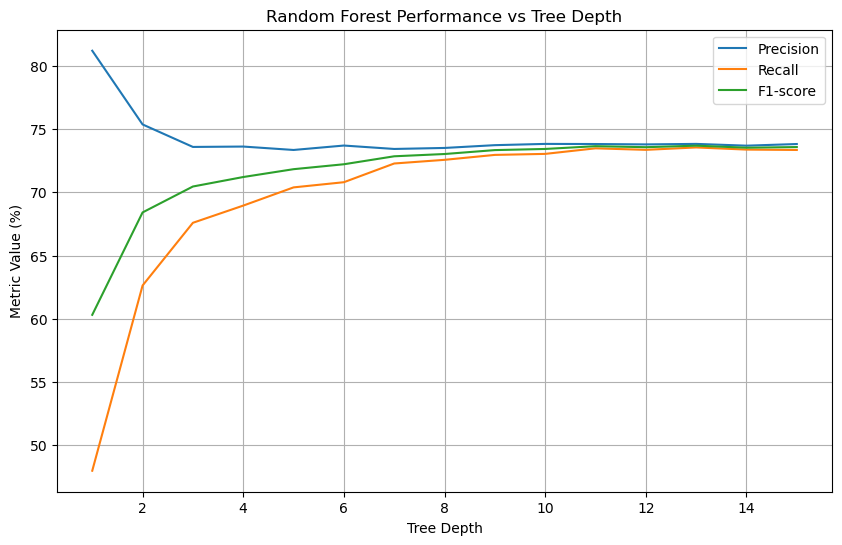

In [28]:
makeGraphMD(RandomForestClassifier, df_x, df_y)


In [30]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from tabulate import tabulate
import numpy as np

def baseline_classifier(model_class, params, df_x, df_y):
    # Identify categorical & numeric columns
    categorical_cols = df_x.select_dtypes(include=['object']).columns
    numeric_cols = df_x.select_dtypes(exclude=['object']).columns

    # Preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # Model pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_class(**params))
    ])

    # Stratified K-Fold
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Safe scoring (prevents NaN)
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }

    # Run Cross Validation
    scores = cross_validate(
        model,
        df_x,
        df_y,
        cv=kfold,
        scoring=scoring
    )

    # Average results
    accuracy  = round(scores['test_accuracy'].mean() * 100, 2)
    precision = round(scores['test_precision'].mean() * 100, 2)
    recall    = round(scores['test_recall'].mean() * 100, 2)
    f1_score_ = round(scores['test_f1'].mean() * 100, 2)

    # Display table
    data = [[accuracy, precision, recall, f1_score_]]
    print(tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))


In [32]:
df_y = df_y.map({'Stayed': 0, 'Left': 1})


In [33]:
baseline_classifier(
    RandomForestClassifier,
    {'random_state':27, 'max_depth':7},
    df_x,
    df_y
)


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.39        73.43     72.28       72.85


In [34]:
modulated_freq_classifier(RandomForestClassifier,{'random_state':27},df_x,df_y,"upsample")


Model Performance:
Accuracy  : 74.66 %
Precision : 74.65 %
Recall    : 74.66 %
F1 Score  : 74.65 %


In [35]:
modulated_freq_classifier(RandomForestClassifier,{'random_state':27},df_x,df_y,"downsample")


Model Performance:
Accuracy  : 74.54 %
Precision : 74.52 %
Recall    : 74.54 %
F1 Score  : 74.52 %


In [57]:
print("Total rows in df_y:", len(df_y))
print("NaN values in df_y:", df_y.isna().sum())

# Show the actual NaN rows (VERY IMPORTANT)
df_y[df_y.isna() == True].head(10)


Total rows in df_y: 59598
NaN values in df_y: 0


Series([], Name: Attrition, dtype: int64)

In [58]:
baseline_classifier(Perceptron, {}, df_x, df_y)


  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     65.74         66.3     68.94       64.28


In [59]:
modulated_freq_classifier(Perceptron,{},df_x,df_y,"upsample")


Model Performance:
Accuracy  : 69.54 %
Precision : 70.11 %
Recall    : 69.54 %
F1 Score  : 69.34 %


In [60]:
modulated_freq_classifier(Perceptron,{},df_x,df_y,"downsample")


Model Performance:
Accuracy  : 65.74 %
Precision : 70.11 %
Recall    : 65.74 %
F1 Score  : 63.41 %


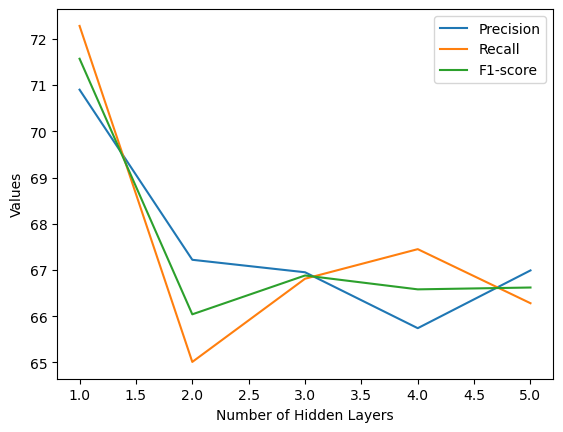

In [23]:
precision = []
recall = []
f1 = []

hidden_layers = [1, 2, 3, 4, 5]   # Number of hidden layers

for i in hidden_layers:
    
    # Correct MLP hidden layer structure (MUST be tuple)
    layer_structure = tuple([100] * i)

    data = returnData(
        MLPClassifier,
        {
            'random_state': 27,
            'hidden_layer_sizes': layer_structure,
            'alpha': 0
        },
        df_x,
        df_y
    )

    precision.append(data[1])
    recall.append(data[2])
    f1.append(data[3])


# Plot
plt.figure()
plt.plot(hidden_layers, precision, label="Precision")
plt.plot(hidden_layers, recall, label="Recall")
plt.plot(hidden_layers, f1, label="F1-score")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Values")
plt.legend()
plt.show()


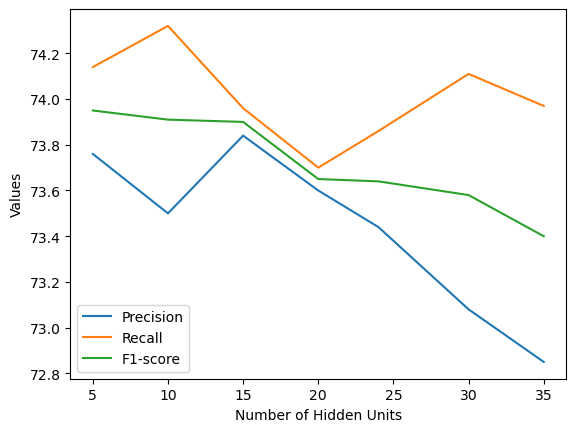

In [24]:
precision = []
recall = []
f1 = []
vals = [5, 10, 15, 20, 24, 30, 35]
for i in vals:
    # print(i)
    data = returnData(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[i], 'alpha':0}, df_x, df_y)
    precision.append(data[1])
    recall.append(data[2])
    f1.append(data[3])

plt.figure()
plt.plot(vals, precision, label = "Precision")
plt.plot(vals, recall, label = "Recall")
plt.plot(vals, f1, label = "F1-score")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Values")
plt.legend()
plt.show()

In [26]:


def baseline_classifier(model_class, params, df_x, df_y):
    """
    Runs cross-validation on a model and prints average metrics.
    Automatically handles numeric features and scaling for MLP or LogisticRegression.
    """
    # Ensure features are numeric (one-hot encode categoricals)
    X = pd.get_dummies(df_x, drop_first=True)
    y = df_y.copy()
    
    # Scale features if using MLP or Perceptron
    if model_class in [MLPClassifier, Perceptron, LogisticRegression]:
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', model_class(**params))
        ])
    else:
        model = model_class(**params)
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    scoring = {
        'accuracy':'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }
    
    scores = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    
    print(f"Accuracy: {scores['test_accuracy'].mean()*100:.2f}%", 
          f"Precision: {scores['test_precision'].mean():.2f}", 
          f"Recall: {scores['test_recall'].mean():.2f}", 
          f"F1: {scores['test_f1'].mean():.2f}")


In [27]:
for i in ['relu', 'identity', 'logistic', 'tanh']:
    baseline_classifier(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[24], 'activation':i}, df_x, df_y)

Accuracy: 74.90% Precision: 0.74 Recall: 0.73 F1: 0.73
Accuracy: 74.94% Precision: 0.74 Recall: 0.73 F1: 0.74
Accuracy: 74.45% Precision: 0.73 Recall: 0.73 F1: 0.73
Accuracy: 74.31% Precision: 0.73 Recall: 0.73 F1: 0.73


In [8]:

def modulated_freq_classifier(model_class, params, df_x, df_y, freq_flag="none"):
    """
    Train a classifier with optional frequency modulation (upsample/downsample).
    Handles categorical variables and scaling for MLP, Perceptron, LogisticRegression.
    """
    X = pd.get_dummies(df_x, drop_first=True)
    y = df_y.copy()
    
    # Initialize model
    if model_class in [MLPClassifier, Perceptron, LogisticRegression]:
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', model_class(**params))
        ])
    else:
        model = model_class(**params)
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0
    
    for train_idx, test_idx in kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Apply frequency modulation
        if freq_flag == "upsample":
            df_train = pd.concat([X_train, y_train], axis=1)
            class_0 = df_train[df_train[y.name]==0]
            class_1 = df_train[df_train[y.name]==1]
            
            if len(class_0) > len(class_1):
                class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
                df_train = pd.concat([class_0, class_1_upsampled])
            else:
                class_0_upsampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)
                df_train = pd.concat([class_1, class_0_upsampled])
            
            X_train = df_train.drop(y.name, axis=1)
            y_train = df_train[y.name]
        
        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy += accuracy_score(y_test, y_pred)
        precision += precision_score(y_test, y_pred, zero_division=0)
        recall += recall_score(y_test, y_pred, zero_division=0)
        f1_Score += f1_score(y_test, y_pred, zero_division=0)
    
    # Average metrics
    n_splits = kfold.get_n_splits()
    print(f"Accuracy: {accuracy/n_splits*100:.2f}%")
    print(f"Precision: {precision/n_splits:.2f}")
    print(f"Recall: {recall/n_splits:.2f}")
    print(f"F1 Score: {f1_Score/n_splits:.2f}")


In [30]:
modulated_freq_classifier(
    MLPClassifier, 
    {'random_state':27, 'hidden_layer_sizes':[24], 'activation':'logistic'}, 
    df_x, 
    df_y, 
    'upsample'
)


Accuracy: 74.16%
Precision: 0.72
Recall: 0.74
F1 Score: 0.73


In [31]:
modulated_freq_classifier(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[24], 'activation':'logistic'}, df_x, df_y, 'downsample')

Accuracy: 74.45%
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
import pandas as pd
import numpy as np

def baseline_classifier(model_class, params, df_x, df_y):
    """
    Robust baseline classifier with:
    - One-hot encoding
    - Feature scaling (auto)
    - Safe precision/recall/f1
    """

    # One-hot encode categorical variables
    X = pd.get_dummies(df_x, drop_first=True)

    # Ensure target is numeric and clean
    y = df_y.astype(int)

    # Choose whether scaling is needed
    if model_class.__name__ in ['LogisticRegression', 'SVC', 'MLPClassifier', 'Perceptron']:
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', model_class(**params))
        ])
    else:
        model = model_class(**params)

    # Stratified K-Fold
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Safe scoring (no NaNs ever)
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }

    scores = cross_validate(
        model,
        X,
        y,
        cv=kfold,
        scoring=scoring
    )

    accuracy  = round(scores['test_accuracy'].mean() * 100, 2)
    precision = round(scores['test_precision'].mean() * 100, 2)
    recall    = round(scores['test_recall'].mean() * 100, 2)
    f1_Score  = round(scores['test_f1'].mean() * 100, 2)

    print("Accuracy    Precision    Recall    F1 Score")
    print("----------  -----------  --------  ----------")
    print(f"{accuracy:10}  {precision:11}  {recall:8}  {f1_Score:10}")


In [ ]:
# Target column
df_y = df['Attrition']

# Feature columns (drop target + ID column)
df_x = df.drop(['Attrition', 'Employee ID'], axis=1)

# Confirm shapes
print("df_x shape:", df_x.shape)
print("df_y shape:", df_y.shape)


In [9]:
df_y = df_y.astype(str).str.strip().str.lower()
df_y = df_y.map({'stayed': 0, 'left': 1})

print("Missing values in df_y:", df_y.isna().sum())
print(df_y.value_counts())


Missing values in df_y: 0
Attrition
0    31260
1    28338
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC

# SVM with different kernels
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f"\nKernel = {i}")
    baseline_classifier(
        SVC, 
        {'kernel': i, 'probability': True}, 
        df_x, 
        df_y
    )


In [5]:
baseline_classifier(SVC,{'kernel':'linear','probability':True},df_x,df_y)

NameError: name 'baseline_classifier' is not defined